In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
import cv2
import os
import numpy as np

In [ ]:
import tensorflow as tf
# Download the saved model file
from google.colab import files
files.download("Model_InceptionV3.h5")

In [ ]:
testing_batches = testing_data.map(format_image).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_loss, test_accuracy = model.evaluate(testing_batches)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

10/10 ━━━━━━━━━━━━━━━━━━━━ 64s 6s/step - accuracy: 0.8828 - loss: 0.3450
Test Accuracy: 0.884984016418457
Test Loss: 0.34543555974960327


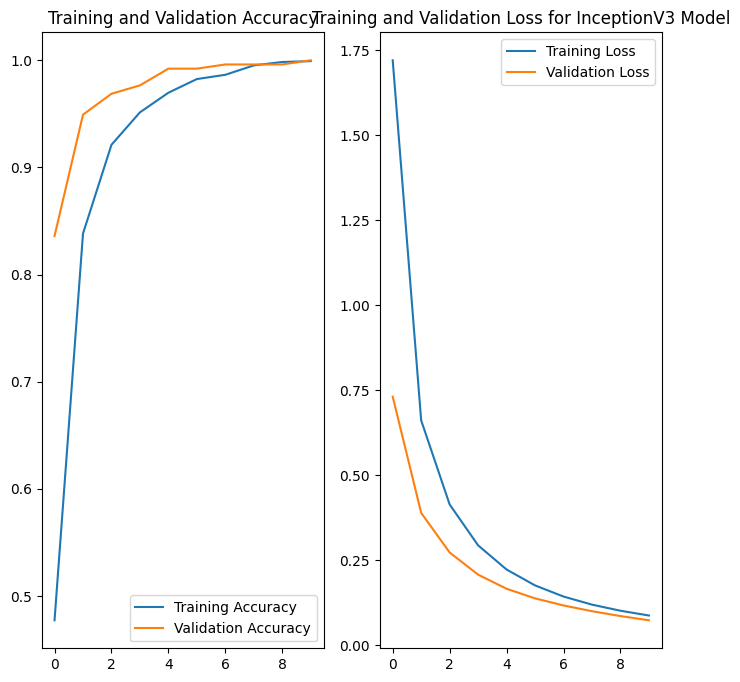

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# The number of epochs was set to 10 in model.fit
EPOCHS = 10  # Define EPOCHS here
epochs_range = range(EPOCHS) # This line was repeated unnecessarily


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss for InceptionV3 Model')
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step


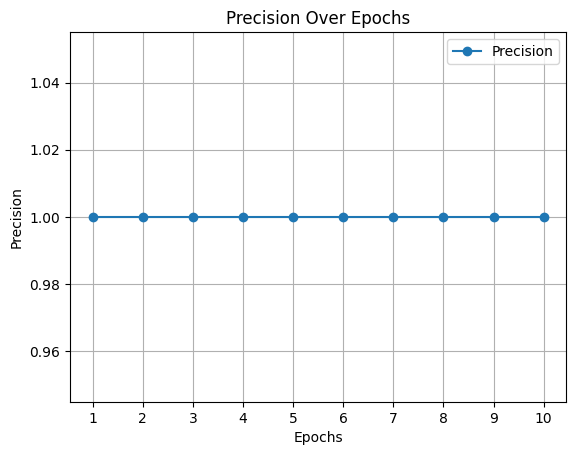

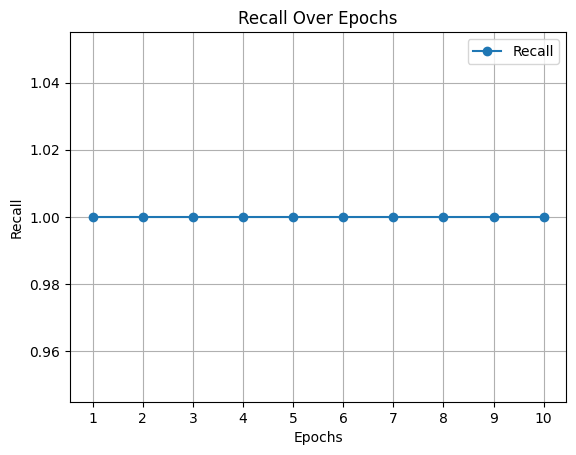

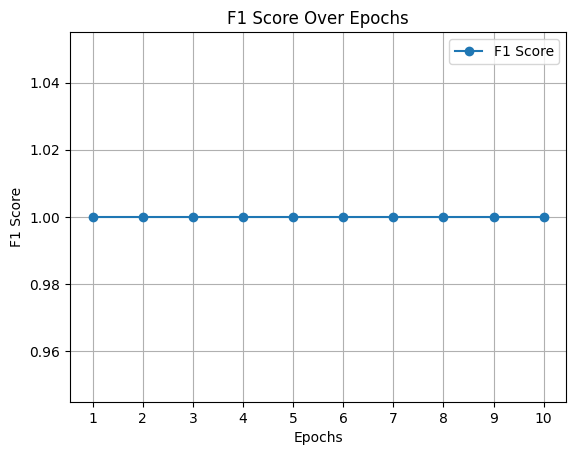

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

def plot_metric_over_epochs(metric_history, metric_name):
    plt.plot(range(1, len(metric_history) + 1), metric_history, marker='o', label=metric_name)
    plt.title(f'{metric_name} Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel(metric_name)
    plt.xticks(range(1, len(metric_history) + 1))
    plt.grid(True)
    plt.legend()
    plt.show()

# Assuming you have your model and validation_batches defined
# Get predictions on the validation data
y_pred_probs = model.predict(validation_batches)
y_pred = np.argmax(y_pred_probs, axis=1)

# Get true labels from validation_batches
y_true = np.concatenate([y for x, y in validation_batches], axis=0)

# Calculate precision, recall, and F1 score for each epoch
precision_history = []
recall_history = []
f1_history = []

for i in range(10):  # Replace 10 with the number of epochs you trained for
    # Calculate metrics for this epoch
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

    precision_history.append(precision)
    recall_history.append(recall)
    f1_history.append(f1)

# Plot precision, recall, and F1 score
plot_metric_over_epochs(precision_history, 'Precision')
plot_metric_over_epochs(recall_history, 'Recall')
plot_metric_over_epochs(f1_history, 'F1 Score')

Found 1568 images belonging to 15 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 227s 5s/step


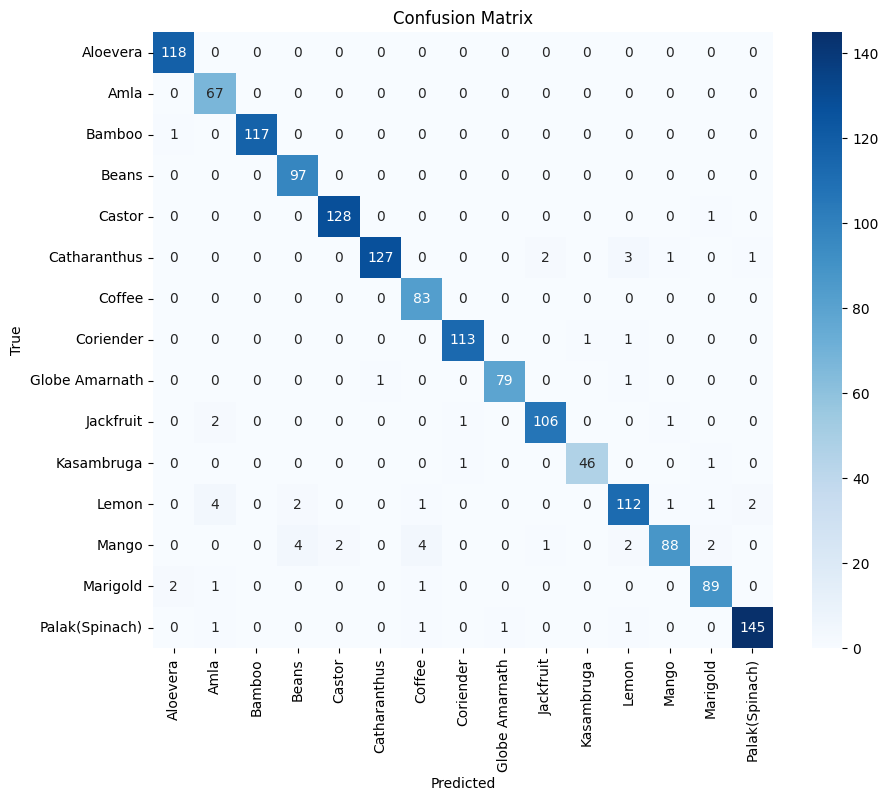

Classification Report:

                precision    recall  f1-score   support

      Aloevera       0.98      1.00      0.99       118
          Amla       0.89      1.00      0.94        67
        Bamboo       1.00      0.99      1.00       118
         Beans       0.94      1.00      0.97        97
        Castor       0.98      0.99      0.99       129
  Catharanthus       0.99      0.95      0.97       134
        Coffee       0.92      1.00      0.96        83
     Coriender       0.98      0.98      0.98       115
Globe Amarnath       0.99      0.98      0.98        81
     Jackfruit       0.97      0.96      0.97       110
    Kasambruga       0.98      0.96      0.97        48
         Lemon       0.93      0.91      0.92       123
         Mango       0.97      0.85      0.91       103
      Marigold       0.95      0.96      0.95        93
Palak(Spinach)       0.98      0.97      0.98       149

      accuracy                           0.97      1568
     macro avg       0

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator

def plot_confusion_matrix(model, generator):
    # Predict the classes
    Y_pred = model.predict(generator)
    y_pred = np.argmax(Y_pred, axis=1)

    # True labels
    true_labels = generator.classes

    # Get class names
    class_names = list(generator.class_indices.keys())

    # Create the confusion matrix
    cm = confusion_matrix(true_labels, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Print classification report
    print("Classification Report:\n")
    print(classification_report(true_labels, y_pred, target_names=class_names))

# Create the validation generator
validation_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    dataset_path,
    target_size=(IMAGE_RES, IMAGE_RES),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
)

# Call the function with your model and validation generator
plot_confusion_matrix(model, validation_generator)

In [ ]:
import tensorflow as tf
# Suppress TensorFlow warnings
tf.get_logger().setLevel("ERROR")
# Save the trained model to a file
model.save("/content/drive/MyDrive/Models/Model_InceptionV3.h5")
# Download the saved model file
from google.colab import files
files.download("Model_InceptionV3.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


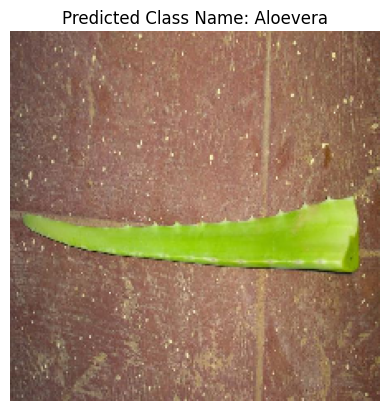

In [ ]:
input_image_path = '/content/drive/MyDrive/Plant Images/alovera.jpg'
input_image = load_img(input_image_path, target_size=(IMAGE_RES, IMAGE_RES))
input_image_array = img_to_array(input_image)
input_image_array = input_image_array / 255.0  # Normalize the image
input_image_array = input_image_array[tf.newaxis, ...]
predictions = model.predict(input_image_array)
predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]
predicted_class_name = data.class_names[predicted_class_index]
plt.imshow(input_image)
plt.title("Predicted Class Name: " + predicted_class_name)
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


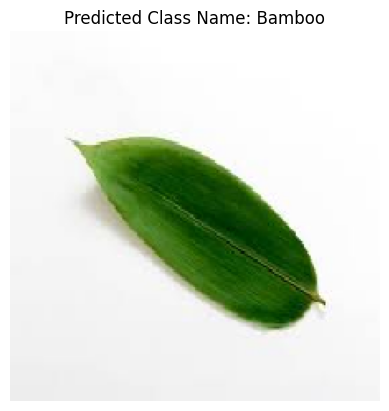

In [ ]:
input_image_path = '/content/drive/MyDrive/Plant Images/Bamboo.jpeg'
input_image = load_img(input_image_path, target_size=(IMAGE_RES, IMAGE_RES))
input_image_array = img_to_array(input_image)
input_image_array = input_image_array / 255.0  # Normalize the image
input_image_array = input_image_array[tf.newaxis, ...]
predictions = model.predict(input_image_array)
predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]
predicted_class_name = data.class_names[predicted_class_index]
plt.imshow(input_image)
plt.title("Predicted Class Name: " + predicted_class_name)
plt.axis("off")
plt.show()

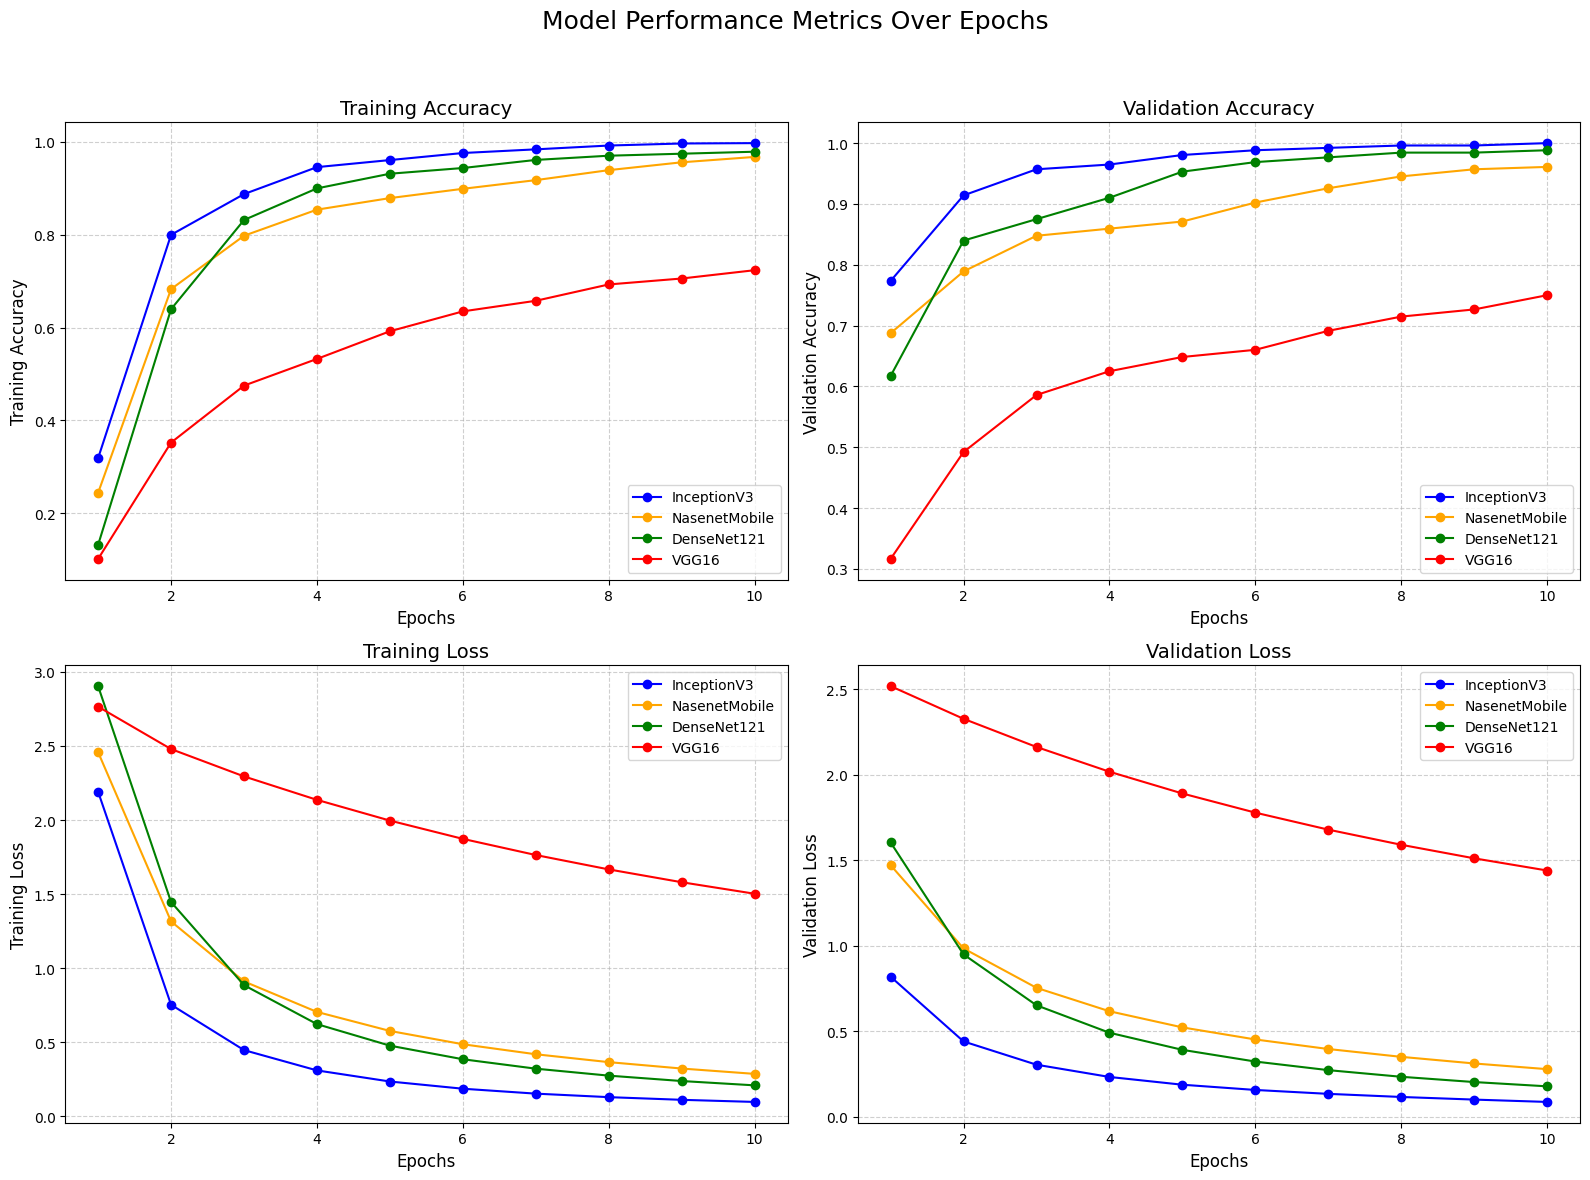

In [ ]:
import matplotlib.pyplot as plt

# Data for InceptionV3 (updated)
epochs_inception = list(range(1, 11))
train_accuracy_inception = [0.3187, 0.7998, 0.8875, 0.9456, 0.9608, 0.9760, 0.9839, 0.9921, 0.9965, 0.9973]
val_accuracy_inception = [0.7734, 0.9141, 0.9570, 0.9648, 0.9805, 0.9883, 0.9922, 0.9961, 0.9961, 1.0000]
train_loss_inception = [2.1911, 0.7533, 0.4469, 0.3099, 0.2350, 0.1863, 0.1531, 0.1294, 0.1114, 0.0971]
val_loss_inception = [0.8200, 0.4415, 0.3056, 0.2340, 0.1886, 0.1580, 0.1352, 0.1170, 0.1017, 0.0880]

# Data for NasnetMobile
epochs_nasnet = list(range(1, 11))
train_accuracy_nasnet = [0.2440, 0.6829, 0.7978, 0.8540, 0.8789, 0.8989, 0.9176, 0.9391, 0.9560, 0.9676]
val_accuracy_nasnet = [0.6875, 0.7891, 0.8477, 0.8594, 0.8711, 0.9023, 0.9258, 0.9453, 0.9570, 0.9609]
train_loss_nasnet = [2.4582, 1.3158, 0.9108, 0.7047, 0.5764, 0.4865, 0.4189, 0.3658, 0.3225, 0.2865]
val_loss_nasnet = [1.4719, 0.9852, 0.7549, 0.6180, 0.5237, 0.4531, 0.3973, 0.3515, 0.3128, 0.2796]

# Data for DenseNet121
epochs_densenet = list(range(1, 11))
train_accuracy_densenet = [0.1320, 0.6396, 0.8317, 0.8998, 0.9314, 0.9437, 0.9611, 0.9702, 0.9745, 0.9788]
val_accuracy_densenet = [0.6172, 0.8398, 0.8750, 0.9102, 0.9531, 0.9688, 0.9766, 0.9844, 0.9844, 0.9883]
train_loss_densenet = [2.9042, 1.4467, 0.8854, 0.6224, 0.4770, 0.3852, 0.3216, 0.2746, 0.2382, 0.2090]
val_loss_densenet = [1.6049, 0.9503, 0.6529, 0.4924, 0.3924, 0.3240, 0.2738, 0.2350, 0.2042, 0.1792]

# Data for VGG16
epochs_vgg = list(range(1, 11))
train_accuracy_vgg = [0.1017, 0.3523, 0.4750, 0.5325, 0.5921, 0.6349, 0.6577, 0.6929, 0.7057, 0.7236]
val_accuracy_vgg = [0.3164, 0.4922, 0.5859, 0.6250, 0.6484, 0.6602, 0.6914, 0.7148, 0.7266, 0.7500]
train_loss_vgg = [2.7656, 2.4792, 2.2947, 2.1364, 1.9964, 1.8730, 1.7639, 1.6669, 1.5803, 1.5025]
val_loss_vgg = [2.5185, 2.3274, 2.1628, 2.0181, 1.8909, 1.7789, 1.6796, 1.5911, 1.5119, 1.4407]

# Plotting all graphs
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Metrics Over Epochs', fontsize=18)

# Training Accuracy
axes[0, 0].plot(epochs_inception, train_accuracy_inception, marker='o', label='InceptionV3', color='blue')
axes[0, 0].plot(epochs_nasnet, train_accuracy_nasnet, marker='o', label='NasenetMobile', color='orange')
axes[0, 0].plot(epochs_densenet, train_accuracy_densenet, marker='o', label='DenseNet121', color='green')
axes[0, 0].plot(epochs_vgg, train_accuracy_vgg, marker='o', label='VGG16', color='red')
axes[0, 0].set_title('Training Accuracy', fontsize=14)
axes[0, 0].set_xlabel('Epochs', fontsize=12)
axes[0, 0].set_ylabel('Training Accuracy', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(True, linestyle='--', alpha=0.6)

# Validation Accuracy
axes[0, 1].plot(epochs_inception, val_accuracy_inception, marker='o', label='InceptionV3', color='blue')
axes[0, 1].plot(epochs_nasnet, val_accuracy_nasnet, marker='o', label='NasenetMobile', color='orange')
axes[0, 1].plot(epochs_densenet, val_accuracy_densenet, marker='o', label='DenseNet121', color='green')
axes[0, 1].plot(epochs_vgg, val_accuracy_vgg, marker='o', label='VGG16', color='red')
axes[0, 1].set_title('Validation Accuracy', fontsize=14)
axes[0, 1].set_xlabel('Epochs', fontsize=12)
axes[0, 1].set_ylabel('Validation Accuracy', fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(True, linestyle='--', alpha=0.6)

# Training Loss
axes[1, 0].plot(epochs_inception, train_loss_inception, marker='o', label='InceptionV3', color='blue')
axes[1, 0].plot(epochs_nasnet, train_loss_nasnet, marker='o', label='NasenetMobile', color='orange')
axes[1, 0].plot(epochs_densenet, train_loss_densenet, marker='o', label='DenseNet121', color='green')
axes[1, 0].plot(epochs_vgg, train_loss_vgg, marker='o', label='VGG16', color='red')
axes[1, 0].set_title('Training Loss', fontsize=14)
axes[1, 0].set_xlabel('Epochs', fontsize=12)
axes[1, 0].set_ylabel('Training Loss', fontsize=12)
axes[1, 0].legend()
axes[1, 0].grid(True, linestyle='--', alpha=0.6)

# Validation Loss
axes[1, 1].plot(epochs_inception, val_loss_inception, marker='o', label='InceptionV3', color='blue')
axes[1, 1].plot(epochs_nasnet, val_loss_nasnet, marker='o', label='NasenetMobile', color='orange')
axes[1, 1].plot(epochs_densenet, val_loss_densenet, marker='o', label='DenseNet121', color='green')
axes[1, 1].plot(epochs_vgg, val_loss_vgg, marker='o', label='VGG16', color='red')
axes[1, 1].set_title('Validation Loss', fontsize=14)
axes[1, 1].set_xlabel('Epochs', fontsize=12)
axes[1, 1].set_ylabel('Validation Loss', fontsize=12)
axes[1, 1].legend()
axes[1, 1].grid(True, linestyle='--', alpha=0.6)

# Adjust layout and show the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()